# TP1 : Interpolation polynomiale

In [1]:
def racine(a,b):
    if a==0:
        if b==0:
            print("tout réel est solution")
        else:
            print("impossible")
    else:
            print("la solution est ",-b/a)
           

In [4]:
racine(0,5)
racine(0,0)
racine(4,2)

impossible
tout réel est solution
la solution est  -0.5


In [14]:
import numpy as np 
def matrice(n,p):
    a=np.zeros((n,p))
    for i in np.arange(0,n):
        for j in np.arange(0,p):
            if i<j:
                a[i,j]=n-p-1
            elif j<i:
                a[i,j]=n+p+1
            else:
                a[i,j]=n*p
    return a

             
                
    

In [16]:
matrice(3,5)

array([[15., -3., -3., -3., -3.],
       [ 9., 15., -3., -3., -3.],
       [ 9.,  9., 15., -3., -3.]])

## Objectif

L'objectif de ce TP est :

- d'interpoler un nombre de points donné par un polynôme en utilisant les méthodes d'interpolation de  ***Lagrange et de Newton***,

- d'étudier l'évolution de l'erreur d'interpolation, d'une fonction, en fonction du nombre de points à interpoler.

## Rappel sur l'interpolation 

Soient $n+1$ points $(x_0, y_0)$, $(x_1, y_1)$, ....., $(x_n, y_n)$. Interpoler ces points correspond à déterminer le polynôme $P\in\mathbb{R}_n[X]$ passant par ces derniers : $\forall i\in\{0,\cdots,n\}$, $P(x_i)=y_i$.
Les abscisses $(x_i)_{0\leq i\leq n}$ et les ordonnées $(y_i)_{0\leq i\leq n}$  sont appelées, respectivement, les points et les valeurs d’interpolation. Pour interpoler une fonction $f$, on définit ses valeurs d’interpolation comme suit : $$ y_i = f(x_i),\;\forall\;0\leq i\leq n.$$ Dans ce qui suit, nous présentons deux méthodes d'interpolation : par les polynômes de Lagrange et par les polynômes de Newton.

# Interpolation de Lagrange
## Théorème


Soient $n+1$ points de coordonnées $(x_i,y_i)_{0\leq i\leq n}$ tels que $x_i\neq x_j$, pour $0\leq i,j\leq n$ et $i\neq j$. Il existe alors un unique polynôme d'interpolation de Lagrange $P_n\in\mathbb{R}_n[X]$ vérifiant $P_n(x_i)=y_i$, $\forall i\in\{0,\cdots,n\}$ et s'exprimant comme suit :
$$P_n(x)=\sum_{i=0}^{n}y_iL_i(x),\quad x\in\mathbb{R}$$
où $\displaystyle L_i(x)=\underset{j\neq i}{\prod_{j=0}^{n}}\frac{x-x_j}{x_i-x_j}$.

La famille de polynômes de Lagrange $\{L_0,L_1,\cdots,L_n\}$ associés aux points  $(x_i,y_i)_{0\leq i\leq n}$  est une base de l'ensemble $\mathbb{R}_n[X]$.

**Exercice 1**

Ecrire une fonction `Lagrange(t,i,x)` qui évalue, en `t`, le  polynôme de Lagrange $L_i$, $i\in\{0,\cdots,n\}$ associé aux points d'interpolation  $x=(x_i)_{0\leq i\leq n}$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def Lagrange(t,i,x):
    prod=1
    n=len(x)
    for j in np.arange(0,n):
      if j!=i:
        prod*=((t-x[j])/(x[i]-x[j]))
    return prod         
 
   

**Application 1:**

Tester la fonction `Lagrange(t,i,x)`sur les points $\{-1,0,1\}$. Représenter les polynômes $L_0$, $L_1$ et $L_2$ sur $\[-1,1]\$. 

Text(1, 1.05, '(1,1)')

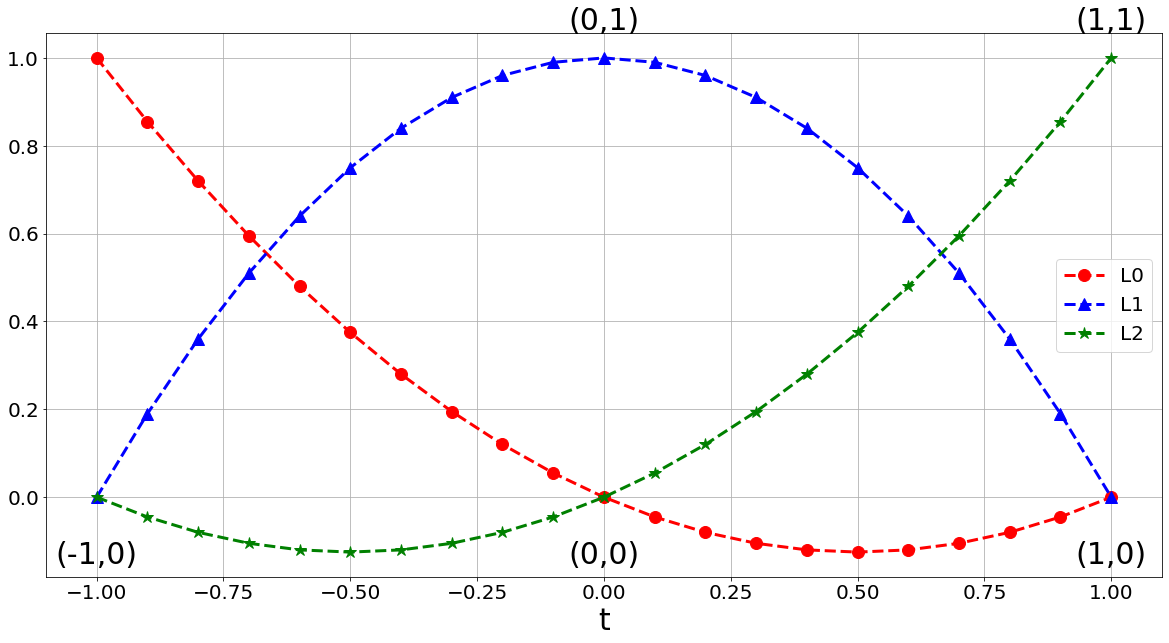

In [6]:
#Compléter le code suivant
x=np.arange(-1,2)
t=np.linspace(-1,1,21) # déclarer  un tableau 1D allant de -1 à 1 contenant 21 éléments.
plt.figure(figsize=(20,10))
plt.plot(t,Lagrange(t,0,x),'ro--',t,Lagrange(t,1,x),'b^--',t, Lagrange(t,2,x),'g*--',linewidth=3,markersize=12) 
plt.xlabel('t',fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.legend(('L0','L1','L2'),fontsize=20, loc = 0) 
plt.grid(True)
plt.text(-1,-0.1,"(-1,0)",ha="center",va="top",fontsize=30)
plt.text(0,-0.1,"(0,0)",ha="center",va="top",fontsize=30)
plt.text(1,-0.1,"(1,0)",ha="center",va="top",fontsize=30)
#......................................................................# à la position (-1,1.05) afficher "(0,1)"
plt.text(0,1.05,"(0,1)",ha="center",va="bottom",fontsize=30)
plt.text(1,1.05,"(1,1)",ha="center",va="bottom",fontsize=30)

**Exercice 2:**

Ecrire une fonction `Interpolation_Lagrange(t,x,y)` qui évalue, 
en  $t$, le  polynôme d'interpolation $P$ de Lagrange associé aux points d'interpolation  $(x_i,y_i)_{0\leq i\leq n}$, avec $x=(x_i)_{0\leq i\leq n}$ et $y=(y_i)_{0\leq i\leq n}$.   
Représenter ensuite le polynôme $P$ graphiquement qui interpole les points $(-1,8)$, $(0,3)$ et $(1,6)$.

In [14]:
def Interpolation_Lagrange(t,x,y):
    sum=0
    n=len(y)
    for i in np.arange(0,n):
        sum+=(y[i]*Lagrange(t,i,x))
    return sum
    

Text(0.5, 0, 't')

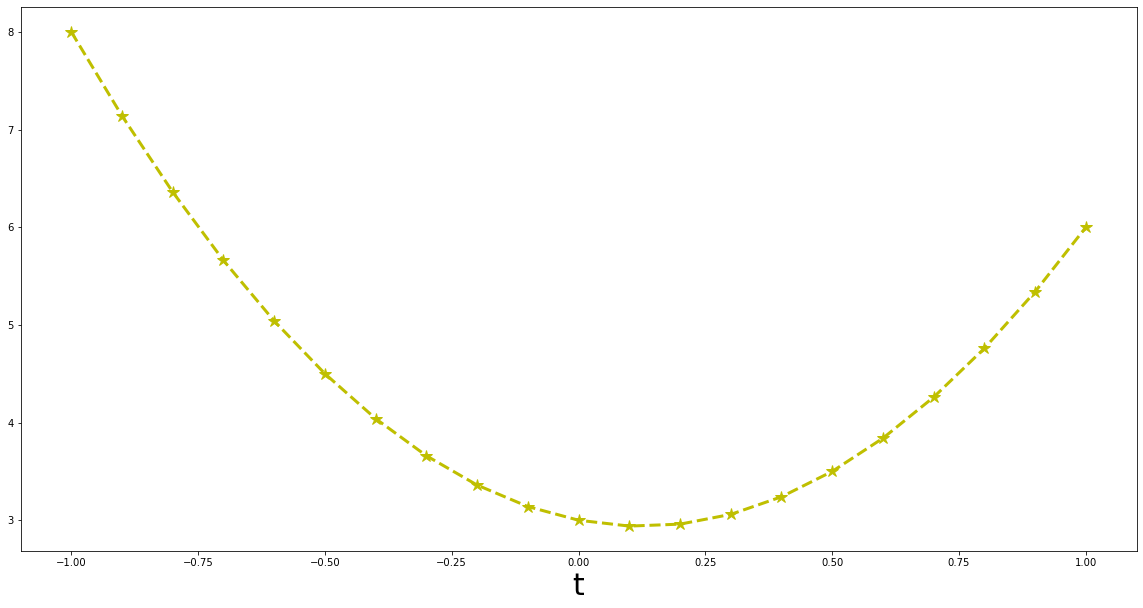

In [26]:
x=[-1,0,1]
y=[8,3,6]
t=np.linspace(-1,1,21)
plt.figure(figsize=(20,10))
plt.plot(t,Interpolation_Lagrange(t,x,y),"y*--",linewidth=3,markersize=12) 
plt.xlabel('t',fontsize=30)


***Application 2:***

1. Interpoler, par la méthode de Lagrange, la fonction  $\cos$ aux points d'interpolation : $\{-\pi,-\frac{\pi}{2},0,\frac{\pi}{2},\pi\}$.  
2. Sur $[-\frac{3\pi}{2},\frac{3\pi}{2}]$, tracer sur un même graphe la courbe de la fonction $\cos$ et $P$, son polynôme d'interpolation de Lagrange associé aux points $\{-\pi,-\frac{\pi}{2},0,\frac{\pi}{2},\pi\}$.
3. Interpréter les résultats.

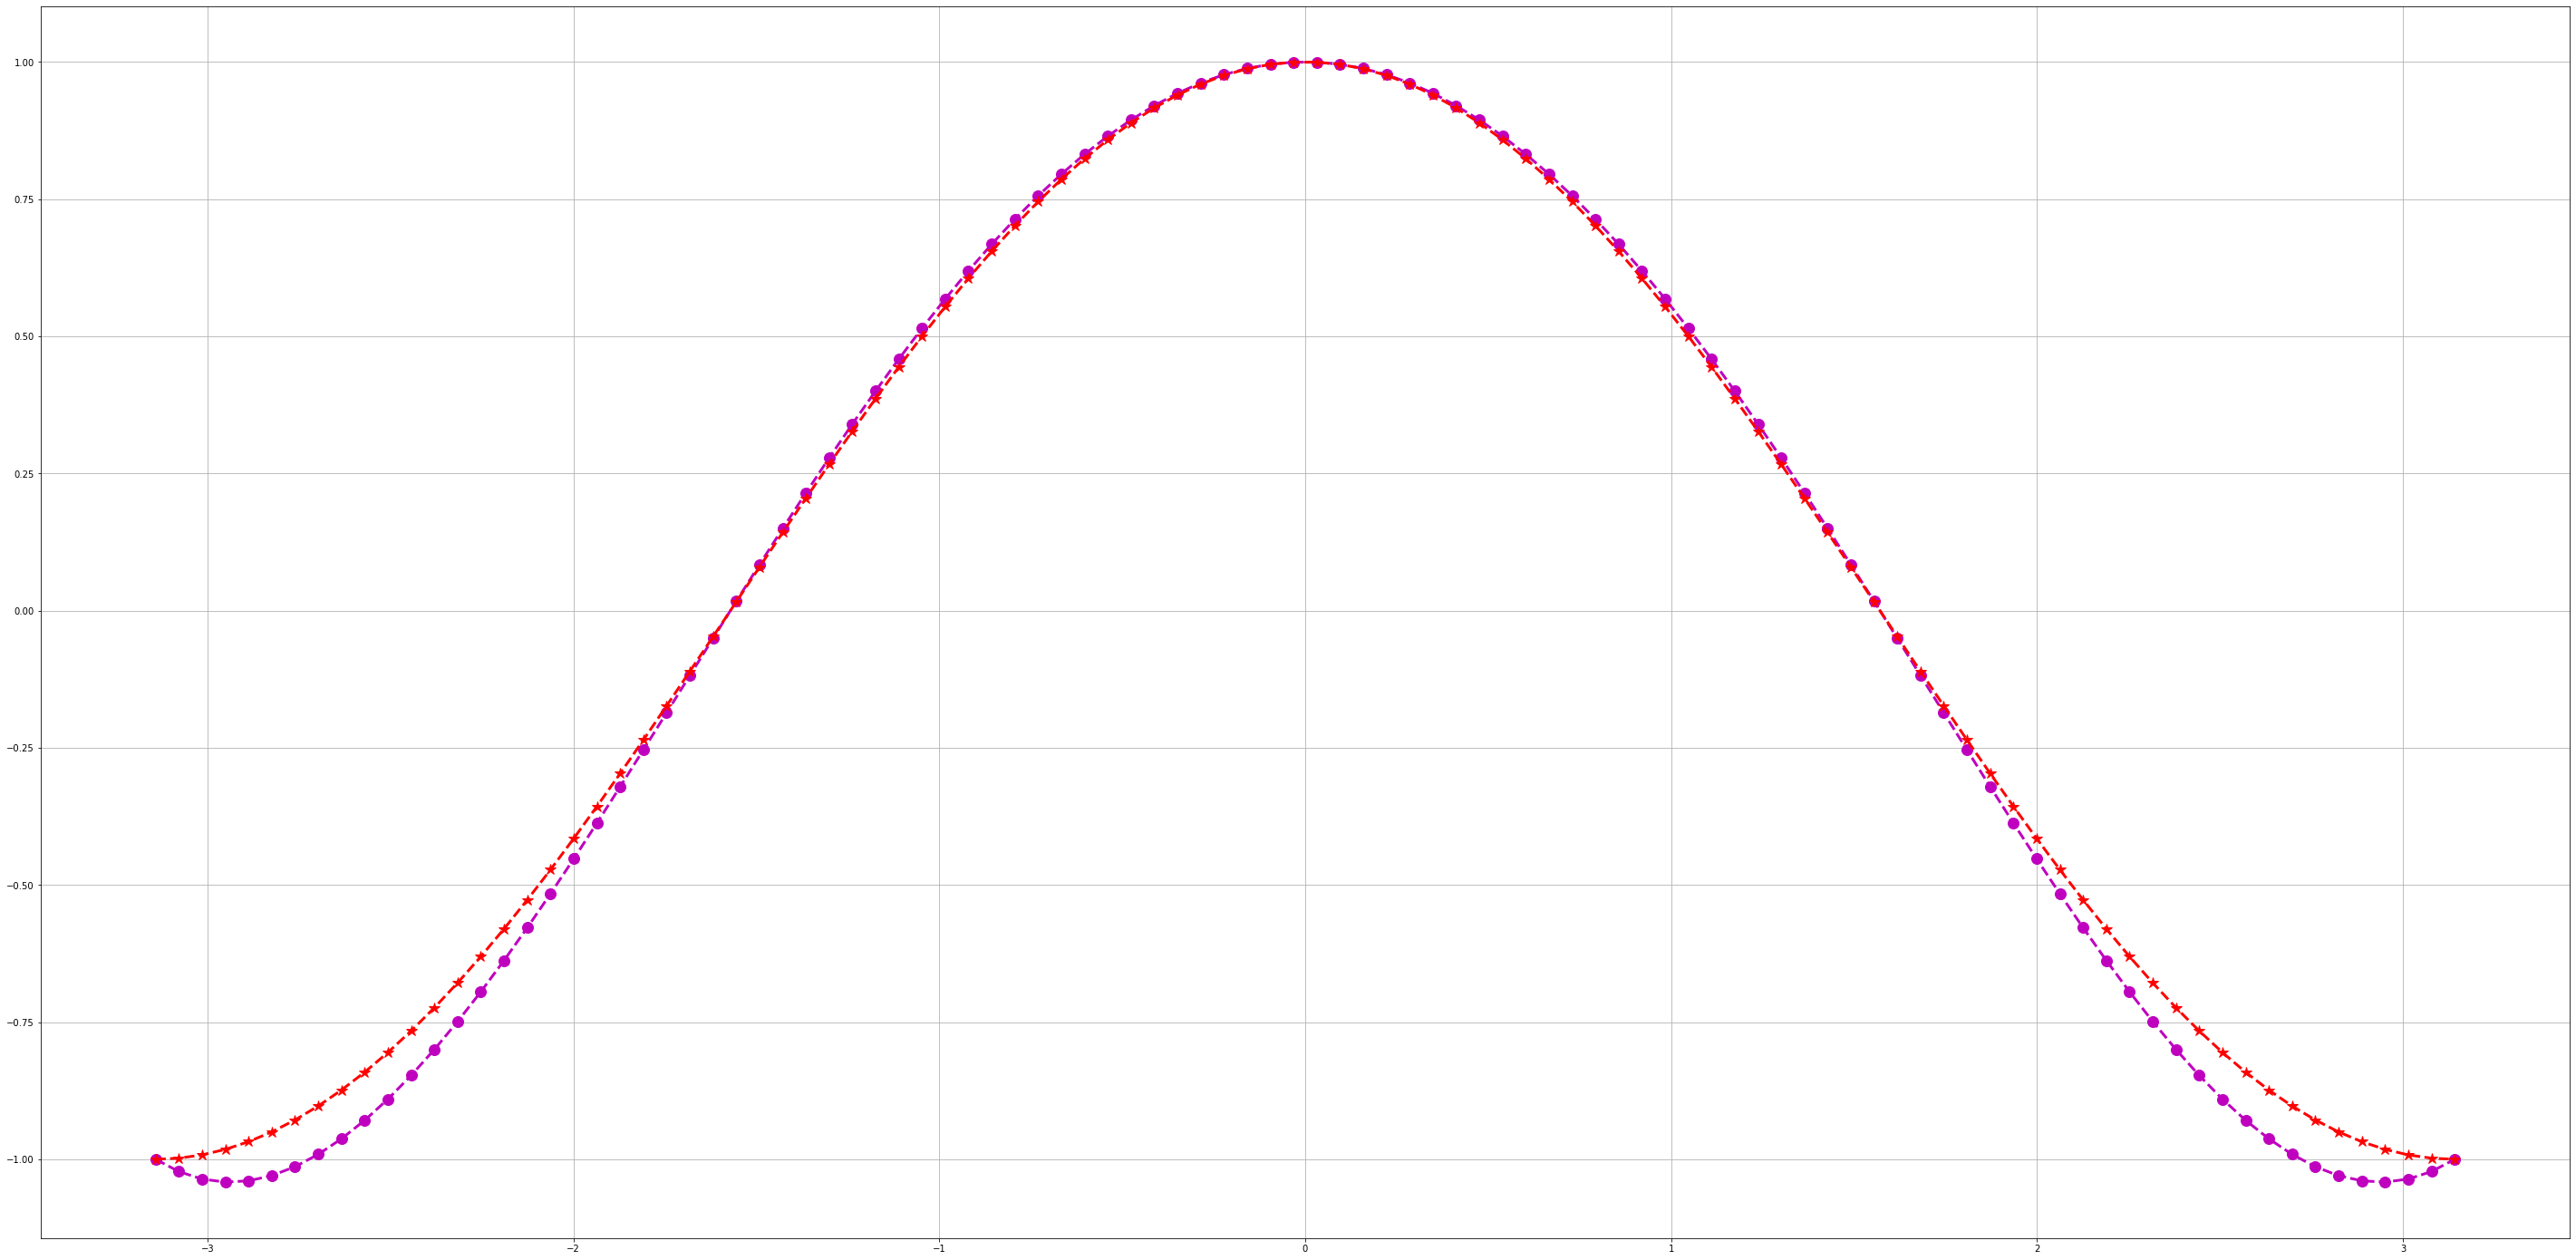

In [44]:
xx=np.arange(-np.pi,1.5*np.pi,0.5*np.pi)
yy=[np.cos(item) for item in xx]
tt=np.linspace(-np.pi,np.pi,100)
P=Interpolation_Lagrange(tt,xx,yy)


plt.figure(figsize=(50,25))
plt.plot(tt,P,'mo--',tt,np.cos(tt),"r*--",linewidth=3,markersize=12) 
#.....................................................................# nommer  "t" l'axe des abscisses
#plt.xticks(fontsize=20) 
#plt.yticks(fontsize=20)
plt.grid(True)
#.....................................................................#Ajouter une légende 
#plt.text(-1,8.5,"(-1,8)",ha="center",va="top",fontsize=30)
#plt.text(0,3.5,"(0,3)",ha="center",va="top",fontsize=30)
#......................................................................# à la position (1,6.5) afficher "(1,6)"

***Inconvénient***  
Un inconvénient majeur de la méthode d'interpolation par les polynômes de Lagrange réside en l'ajout d'un point  $(x_{n+1},y_{n+1})$ à l'ensemble de $n$ points d'interpolation. Dans ce cas, il n'est numériquement pas évident  de déduire $P_{n+1}$ de $P_{n}$. Tous les calculs seront refaits de zéro. D'où l'introduction de l'interpolation par les polynômes de Newton.

# Interpolation de Newton
## Théorème


Soient $n+1$ points de coordonnées $(x_i,y_i)_{0\leq i\leq n}$ tels que $x_i\neq x_j$, pour $0\leq i,j\leq n$ et $i\neq j$. Il existe alors un unique polynôme d'interpolation $P_n\in\mathbb{R}_n[X]$ vérifiant $P_n(x_i)=y_i$, $\forall i\in\{0,\cdots,n\}$ et s'exprimant comme :
\begin{eqnarray}
P_n(x) &=& \sum_{i=0}^n \beta_i \omega_i(x),\quad x\in\mathbb{R} \\
&=& \beta_0.\underset{\omega_0}{\underbrace{1}} +\beta_1\underset{\omega_1}{\underbrace{(x-x_0)}}+\beta_2\underset{\omega_2}{\underbrace{(x-x_0)(x-x_1)}}+....+ \beta_n \underset{\omega_n}{\underbrace{(x-x_0)(x-x_1)...(x-x_{n-1})}}
\end{eqnarray}
où $\displaystyle \omega_i(x)=\prod_{j=0}^{i-1}(x-x_i)$, $\forall 1\leq i \leq n$ et $\omega_0(x)=1$, corespondent aux polynômes de Newton.

La famille de polynômes de Newton $\{\omega_0,\omega_1,\cdots,\omega_n\}$ associés aux points  $(x_i,y_i)_{0\leq i\leq n}$  forme une base de l'ensemble $\mathbb{R}_n[X]$.

Les réels $\beta_i$, $i\in\{0,\cdots,n\}$ correspondent aux coefficients du polynôme. Pour les déterminer, nous utilisons la méthode des différences divisées.    

**Exercice 3**  
Ecrire une fonction `Newton(t,i,x)` qui évalue, en `t`, le  polynôme de Newton $\omega_i$, $i\in\{0,\cdots,n\}$ associé aux points d'interpolation  $x=(x_i)_{0\leq i\leq n}$.

#Completer le code
def Newton(t,i,x):   
    n=len(x)  #n est la longueur du vecteur x
    if i==0:
        return np.ones((len(t)))
    else:
        W=1
        for j in np.arange(......,.....):
            ..............................
       return W

In [ ]:
#Completer le code
import numpy as np
import matplotlib.pyplot as plt
def Newton(t,i,x):
    n=len(x)#n est la longueur du vecteur x
    W=1
    if i==0:
        return np.ones((len(t)))
    else:
        w=1
        for j in np.arange(0,n):
            w=w*(t-x[j])
    return W

**Application 3**  
Tester la fonction `Newton(t,i,x)` sur les points $\{-1,0,1\}$. Représenter les polynômes $\omega_0$, $\omega_1$ et $\omega_2$ sur $\[-1,1]\$.

## Différences divisées
### Définition

On considère $(n+1)$ points  $\displaystyle (x_i,y_i)_{0\leq i \leq n}$, deux à deux distincts :  

1. La différence divisée d'ordre $1$ de $x_{i-1}$ et $x_i$, $0<i\leq n$ est :
$$f[x_{i-1}, x_i]=\frac{y_i-y_{i-1}}{x_i-x_{i-1}}$$
2. La différence divisée d'ordre $n$ des $n+1$ points est définie par récurrence entre deux différences divisées d'ordre $n-1$ comme suit :
$$f[x_0, x_1,\cdots, x_n]=\frac{f[x_1,\cdots, x_n]-f[x_0, x_1,\cdots, x_{n-1}]}{x_n-x_{0}}$$
 

### Explication de la méthode des différences divisées pour le calcul des $\beta_i$, $0\leq i\leq n$.

Le polynome d’interpolation de degré $n$, $P_n$ par la méthode Newton, évalué au point $x_0$
donne 
$$ P_n(x_0)=  \sum_{i=0}^n \beta_0 \omega_i(x_0) = \beta_0 =y_0= f[x_0].$$
On note $f[x_0]=y_0$ la différence divisée d'ordre $0$, correspondante à $\beta_0$.
De même, on évalue le polynome d'interpolation de Newton, $P_n$, au point $x_1$. On obtient :
\begin{eqnarray}
P_n(x_1) &=& \sum_{i=0}^n \beta_i \omega_i(x_1) \\
&=& \beta_0 +\beta_1(x_1-x_0)\\
&=& f[x_0] + \beta_1(x_1-x_0)\\
&=& f[x_1] =y_1
\end{eqnarray}
 d'où
 $$\beta_1 = \frac{f[x_1] - f[x_0]}{x_1 -x_0} =f[x_0, x_1]$$
 $ f[x_0, x_1]$  correspond à  la différence divisée d'ordre $1$. On procède par par récurrence pour obtenir :
 $$\beta_k = \frac{f[x_1, ..., x_k] - f[x_0, ...., x_{k-1}]}{x_k -x_0} =f[x_0, ...,x_k]$$
 où $f[x_0, ..., x_k]$  désigne la différence divisée d’ordre $k$.  

Ci dessous un exemple avec 4 points</center>

<table>
  <thead>
    <tr>
      <th></th>
      <th>$x_i$</th>
      <th>$y_i$</th>
      <th>$f[x_{i-1},x_i]$</th>
      <th>$f[x_{i-2},x_{i-1},x_i]$</th>
      <th>$f[x_{i-3},x_{i-2},x_{i-1},x_i]$</th>
    </tr>
  </thead>
    <tr>
      <td>0</td>
      <td>$x_0$</td>
      <td><font color='red'>$y_0$</font></td>
        <td> </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
      <td>1</td>
      <td>$x_1$</td>
      <td>$y_1$</td>
      <td> <font color='red'>$f[x_0,x_1]=\frac{y_1-y_0}{x_1-x_0}$</font> </td>
       <td> </td>
        <td> </td>
    </tr>
        <tr>
      <td>2</td>
      <td>$x_2$</td>
      <td>$y_2$</td>
      <td>$f[x_1,x_2]=\frac{y_2-y_1}{x_2-x_1}$</td>
       <td> <font color='red'>$f[x_0,x_1,x_2]=\frac{f[x_1,x_2] - f[x_0,x_1]}{x_2-x_0}$</font></td>
        <td> </td>
    </tr>
            <tr>
      <td>3</td>
      <td>$x_3$</td>
      <td>$y_3$</td>
      <td>$f[x_2,x_3]=\frac{y_3-y_2}{x_3-x_2}$</td>
       <td>$f[x_1,x_2,x_3]=\frac{f[x_2,x_3] - f[x_1,x_2]}{x_3-x_1}$</td>
        <td> <font color='red'>$f[x_0,x_1,x_2,x_3]=\frac{f[x_1,x_2,x_3] - f[x_0,x_1,x_2]}{x_3-x_0}$</font> </td>
    </tr>
</table>

$$
\Downarrow
$$

$$(x|B)=\left(
 \begin{array}{c|cccc}
 x_0 & \color{red}{\beta_0=y_0}  & 0 & 0 &0\\
  x_1 & y_1 &  \color{red}{\beta_1=f[x_0,x_1]}  & 0&0 \\
  x_2 & y_2 & f[x_1,x_2] & \color{red}{\beta_2=f[x_0,x_1,x_2]}  &0 \\
  x_3 & y_3 & f[x_2,x_3] & f[x_1,x_2,x_3]& \color{red}{\beta_3=f[x_0,x_1,x_2,x_3]}   \\
 \end{array}\right)
$$

Nous introduisons la fonction `diff_div(x,y)`qui renvoit les coefficients $\beta_i$, $i\in\{0,\cdots,n\}$ en utilisant la méthode des différences divisées.

In [ ]:
def diff_div(x,y):
    n=len(y)
    B=np.zeros((n,n))
    B[:,0]=y[:]
    for j in np.arange(1,n): #compteur sur les colones
        for i in np.arange(j,n): # compteur sur les lignes
            B[i,j]=(B[i,j-1]-B[i-1,j-1])/(x[i]-x[i-j]) # saisir la matrice B (triangulaire inférieure)
    return np.diag(B) # extraction de la diagonale
diff_div(x,y)

**Exercice 4**

Ecrire une fonction `Interpolation_Newton(t,x,y)` qui évalue, en `t`, le  polynôme d'interpolation de Newton associé aux points d'interpolation  $(x_i,y_i)_{0\leq i\leq n}$, avec $x=(x_i)_{0\leq i\leq n}$ et $y=(y_i)_{0\leq i\leq n}$.  
 Représeneter ensuite le polynôme $P$ graphiquement qui interpole les points $(-1,8)$, $(0,3)$ et $(1,6)$.

In [ ]:
def Interpolation_Newton(t,x,y):
  

## Avantages du polynôme  de Newton
Un des avantages de la méthode de Newton pour l'interpolation des points $\displaystyle (x_i,y_i)_{0\leq i \leq n}$, deux à deux distincts, est le suivant : si on note par  $P_k$ le polynôme d'interplation  tronqué : le polynôme de degré inférieur ou égal à $k$, $0\leq k\leq n$, qui interpole que les points $\displaystyle (x_i,y_i)_{0\leq i \leq k}$, exprimé dans la base de polynômes de Newton $\{\omega_1,\cdots,\omega_k\}$, comme suit :
        $$P_k(x)= \beta_0.\underset{\omega_0}{\underbrace{1}} +\beta_1\underset{\omega_1}{\underbrace{(x-x_0)}}+\beta_2\underset{\omega_2}{\underbrace{(x-x_0)(x-x_1)}}+....+ \beta_k \underset{\omega_k}{\underbrace{(x-x_0)(x-x_1)...(x-x_{k-1})}},\quad x\in\mathbb{R},$$
    alors $P_{k+1}$, $0\leq k<n$, le polynôme tronqué de degré inférieur ou égal à $k+1$ interpolant les points $\displaystyle (x_i,y_i)_{0\leq i \leq k+1}$, sera exprimé en fonction de $P_k$ comme suit :    
        
   $$P_{k+1}(x)=P_k(x)+\beta_{k+1}\underset{\omega_{k+1}}{\underbrace{(x-x_0)(x-x_1)..(x-x_{k})}}.$$  
   Par conséquent, si l'on connait le polynôme $P_{n}$, interpolant les points $\displaystyle (x_i,y_i)_{0\leq i \leq n}$, et que l'on rajoute un point d'interpolation $(x_{n+1},y_{n+1})$, alors le polynôme $P_{n+1}$ interpolant les $n+2$ points sera déduit de celui interpolant les anciens $n+1$ points comme suit :
   $$P_{n+1}(x)=P_n(x)+\beta_{n+1}\underset{\omega_{n+1}}{\underbrace{(x-x_0)(x-x_1)..(x-x_{n})}}.$$ 
   Les coefficients $\beta_0, . . . ,\beta_{n}$ resteront les mêmes, il suffit de calculer le coefficient $\beta_{n+1}$ et de déduire le polynôme de Newton associé $\omega_{n+1}=\omega_n(x-x_n)$.    

***Exercice 5*** (Asynchrone)
1. Ecrire une fonction `Interpolation_Newton_opt(t,x,y)` qui optimise le calcul de la détermination du polynôme d'interpolation par la méthode de Newton.
2. Représeneter ensuite le polynôme $P$ graphiquement qui interpole les points $(-1,8)$, $(0,3)$ et $(1,6)$.
3. Comparer les deux fonctions `Interpolation_Newton(t,x,y)` et `Interpolation_Newton_opt(t,x,y)` en terme de temps d'exécution.

In [ ]:
#Compléter le code suivant
def Newton_opt(t,i,x):
    n=len(x)
    if i==0:
        return np.ones((len(t)))
    else:
        .................................................    

In [ ]:
#completer le code
def Interpolation_Newton_opt(t,x,y,beta=diff_div(x,y)):
    n=len(y)
    if len(x)==2:
        return beta[0]+beta[1]*Newton_opt(t,1,x[0:1])
    else:
        return .....................................................................................

In [ ]:
%timeit Interpolation_Newton(t,x,y)
%timeit Interpolation_Newton_opt(t,x,y)
%timeit Interpolation_Lagrange(t,x,y)

# Erreur d'interpolation (Asynchrone)
## Théorème
Soient $f$ une fonction de classe $\mathcal{C}^{n+1}([x_0,x_n])$ et $P_n$ son polynôme d'interpolation aux points $x_0<x_1<\cdots<x_n$. L'erreur d'approximation de $f$ par $P_n$ est donnée par : $\forall x\in[x_0,x_n]$, $$E_n(x)=\mid f(x)-P_n(x)\mid\leq  \frac{\underset{t\in [x_0,x_n]}{\max} \mid f^{(n+1)}(t)\mid}{(n+1)!}\prod_{i=0}^{n}\mid x-x_i\mid.$$

***Exercice 7***  
Soit $f(x)=\frac{1}{1+ 8 x^2}$ définie sur $[-1, 1]$: 
    
Rédiger un script produisant l'affichage, dans une même fenêtre graphique, 
de  l'erreur $E_n=|P_n(x)-f(x)|$ de la fonction $f$ et de ses polynômes d'interpolation
$P_n$ pour $n\in\{5,10, 15, 20, 25, 30\}$.

In [ ]:
f=...................................
N=...........................................#création d'une  liste contenant les diférents degrés à tester.
t= ..........................................# domaine de définition de f réparti sur 100 points
Erreur=np.zeros((len(N),len(t)))
for i in np.arange(0,len(N)):
    x=np.linspace(-1,1,N[i])
    Erreur[i,:]=.............................................
    

In [ ]:
............................................ #la figure doit  avoir une taille 20x20
plt.subplot(3,2,1)
plt.plot(t,Erreur[0,:],linewidth=3) 
plt.title('Erreur pour n=5',fontsize=20) 
plt.grid(True)
plt.subplot(3,2,2)
plt.plot(t,Erreur[1,:],linewidth=3) 
plt.title('Erreur pour n=10',fontsize=20) 
plt.grid(True)
plt.subplot(3,2,3)
plt.plot(t,Erreur[2,:],linewidth=3) 
plt.title('Erreur pour n=15',fontsize=20) 
plt.grid(True)
plt.subplot(3,2,4)
plt.plot(t,Erreur[3,:],linewidth=3) 
plt.title('Erreur pour n=20',fontsize=20)
plt.grid(True)
plt.subplot(3,2,5)
plt.plot(t,Erreur[4,:],linewidth=3) 
plt.title('Erreur pour n=25',fontsize=20) 
plt.grid(True)
plt.xlabel('t',fontsize=30)
plt.subplot(3,2,6)
plt.plot(t,Erreur[5,:],linewidth=3) 
........................................ #Indiquer que cette figure correspond à n=30
plt.grid(True)
plt.xlabel('t',fontsize=30)
plt.xticks(fontsize=20) 
....................................#la taille des caractères sur l'axe de ordonnées est 20

# Exercice d'application:

En relevant toutes les 10 secondes, la vitesse d'écoulement de l'eau dans une conduite
cylindrique, on a obtenu

|temps (seconde)|0 | 10 |20|30| 
|:|:-|:---|:-|:-|
|vitesse  |2.00  | 1.89 |1.72   | 1.44| 

(a) Trouver une approximation de la vitesse pour $t = 15$ secondes via un polynôme interpolant de
degré 2.

(b) Répéter l'opération avec un polynôme de degré 3.




# Références  

[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)